In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [20]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True) #Dosent help the prediction


In [21]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True) #Encode categorical variables

In [22]:
X = df.drop("Exited", axis=1)
y = df["Exited"] #Splitting


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #feature scaling

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train) #training



LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.811
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [30]:
importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

print(importance)


Age                  0.754217
Geography_Germany    0.337190
Balance              0.161139
Geography_Spain      0.038960
EstimatedSalary      0.015744
HasCrCard           -0.010236
Tenure              -0.042637
NumOfProducts       -0.060278
CreditScore         -0.067683
Gender_Male         -0.264718
IsActiveMember      -0.533432
dtype: float64


Variables like Age, IsActiveNumber have a big impact on the result

In [45]:
y_prob = model.predict_proba(X_test)[:, 1]
high_risk = y_prob > 0.7
output = pd.DataFrame({
    'CustomerID': range(len(X_test)),
    'Churn_Probability': y_prob,
    'High_Risk': high_risk
})
output.sort_values('Churn_Probability', ascending=False).head(10) #display the high_risk to churn customers

,CustomerID,Churn_Probability,High_Risk
719,719,0.918213,True
1244,1244,0.866133,True
1861,1861,0.857534,True
1591,1591,0.837777,True
260,260,0.834069,True
231,231,0.831525,True
976,976,0.828785,True
678,678,0.824341,True
1313,1313,0.806098,True
790,790,0.801970,True


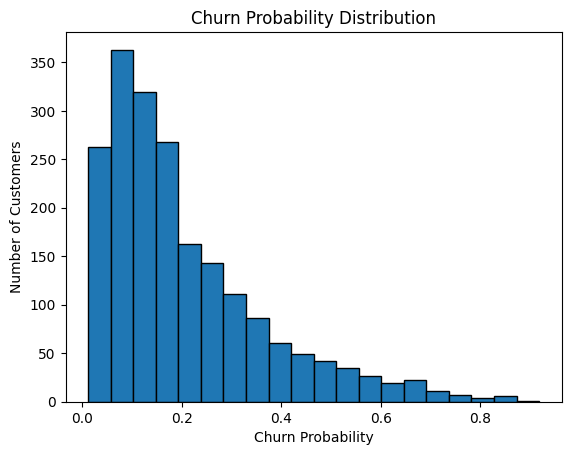

In [43]:


plt.hist(output['Churn_Probability'], bins=20, edgecolor='k')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.title('Churn Probability Distribution')
plt.show()
